# Decision Tree - Supervisied ML - Regression and Classification

Decision Trees are a powerful and intuitive supervised machine learning algorithm used for both **classification and regression tasks**. They work by **recursively partitioning** the data based on the values of the input features, **creating a tree-like structure that models the decisions leading to a particular outcome**.

# **Core Concepts of a Decision Tree:**

A decision tree is a flowchart-like tree structure where an internal node represents feature(or attribute), the branch represents a decision rule, and each leaf node represents the outcome.

Decision tree is a flowchart-like structure consisting of:

* **Root Node:** This is the starting point of the tree, representing the **entire dataset**. The first split is performed at this node.

* **Internal Nodes (Decision Nodes):** These nodes **represent a test** on a specific attribute (feature). Based on the outcome of the test, the data is split into subsets, and the tree branches out.

* **Branches:** These connect the nodes and represent the possible outcomes of the test at an internal node.

* **Leaf Nodes (Terminal Nodes):** These are the **end points of the tree** and represent the final prediction or classification outcome. Data points reaching a leaf node are assigned the class label (in classification) or the average value (in regression) of the training examples in that node.

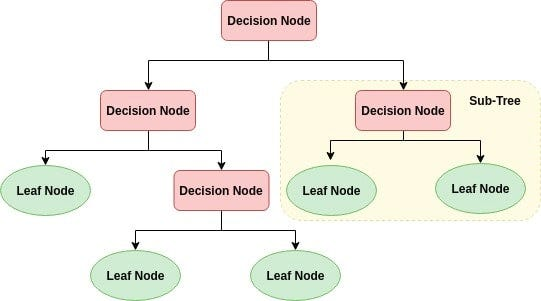

- Decision Tree is a **white box type of ML algorithm**. It shares internal decision-making logic, which is not available in the black box type of algorithms such as Neural Network.

- Its **training time is faster compared to the neural network algorithm**. The time complexity of decision trees is a function of the number of records and the number of attributes in the given data.

- The decision tree is a **distribution-free or non-parametric method**, which does not depend upon probability distribution assumptions.

- Decision trees can **handle high dimensional data with good accuracy**.



## **Process**

The process of building a decision tree involves recursively splitting the data at each node based on a chosen attribute and split point until a stopping criterion is met (e.g., reaching a maximum depth, having a minimum number of samples in a node, or achieving a certain level of purity in the leaf nodes).

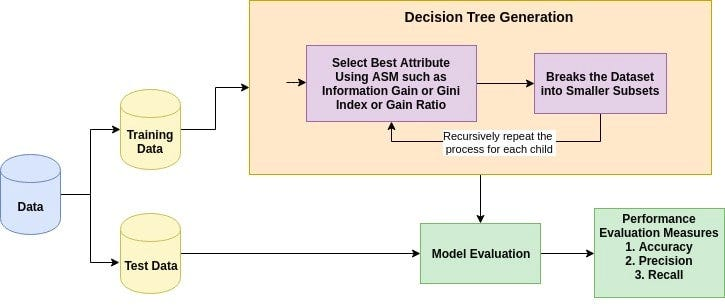



# **The Mathematics Behind Splitting/ Attribute Selection Measures/ Splitting Rules**



- The **key** to building an effective decision tree lies in **selecting the "best" attribute to split the data at each internal node**.

- This selection is bas**ed on metrics that measure the impurity or homogeneity of the data subsets created by the split**.

- The **goal** is to choose splits that result in the **most homogeneous (pure) child nodes possible**, meaning that the data points within each child node belong predominantly to a single class (in classification) or have similar target values (in regression).

Two commonly used metrics for measuring impurity in classification trees are:

1. Gini Impurity

2. Entropy

## **Gini Impurity:**

- Measures the **probability of incorrectly classifying a randomly chosen element in the dataset** if it were randomly labeled according to the distribution of classes in the subset.

- A **lower Gini impurity indicates a more homogeneous set**.

- Another decision tree algorithm CART (Classification and Regression Tree) uses the Gini method to create split points.


The formula for Gini Impurity for a set $D$ is:
$$Gini(D) = 1 - \sum_{i=1}^{c} (p_i)^2$$

where $c$ is the number of classes and $p_i$ is the proportion of samplesbelonging to class $i$ in the set $D$.

When splitting a node based on an attribute, the Gini impurity of the resulting child nodes is calculated, and a weighted average is taken basedon the number of samples in each child node. The split that results in the lowest weighted average Gini impurity is chosen.

## **Entropy:**

This metric, borrowed from information theory, measures the **randomness or impurity of a set of data**. A **lower entropy indicates a more pure set**.

 The formula for Entropy for a set $D$ is:
 $$Entropy(D) = - \sum_{i=1}^{c} p_i \log_2(p_i)$$


 where $c$ is the number of classes and $p_i$ is the proportion of samples belonging to class $i$ in the set $D$.

 The logarithm is typically base 2 because we are often dealing with binary splits, but other bases can be used. If $p_i = 0$, $p_i \log_2(p_i)$ is treated as 0.

# **Information Gain:**

- Decision tree algorithms that use **entropy for splitting** aim to **maximize Information Gain**.

- Information Gain is the **reduction in entropy achieved by splitting the data on a particular attribute**. It quantifies how much uncertainty is reduced by knowing the value of that attribute.


The formula for Information Gain when splitting set $D$ on attribute $A$ is:
$$Information Gain(D, A) = Entropy(D) - \sum_{v \in Values(A)} \frac{|D_v|}{|D|} Entropy(D_v)$$

where $Values(A)$ is the set of possible values for attribute $A$, $D_v$ is the subset of $D$ where attribute $A$ has value $v$, and $|D|$ and $|D_v|$ are the number of samples in sets $D$ and $D_v$ respectively.

**The attribute that yields the highest Information Gain is chosen for splitting at the current node.**

# **For Regression Trees:**



When the target variable is continuous, impurity is typically measured using metrics like Variance or Mean Squared Error (MSE). The goal is to minimize the impurity in the child nodes.

* **Variance Reduction:** The split that minimizes the weighted variance of the target variable in the resulting child nodes is preferred.

The variance of a set of values $Y$ is:
$$Variance(Y) = \frac{1}{n} \sum_{i=1}^{n} (y_i - \bar{y})^2$$
where $n$ is the number of samples and $\bar{y}$ is the mean of the target values.

* **Mean Squared Error (MSE):** Similar to variance reduction, the split that minimizes the weighted MSE in the child nodes is chosen.

    The MSE for a set of values $Y$ with predicted values $\hat{Y}$ is:
    $$MSE(Y, \hat{Y}) = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$
    In the context of a decision tree leaf node, the predicted value $\hat{y}_i$ for all samples in the node is typically the mean of the target values in that node.

# **Decision Tree Algorithms:**


Several algorithms exist for building decision trees, each with its own variations on the splitting criteria and tree construction process:

* **ID3 (Iterative Dichotomiser 3):** Uses **Information Gain** to select the splitting attribute. Primarily handles **categorical features**.

* **C4.5:** An extension of ID3 that can handle **both categorical and continuous** features. It uses **Information Gain Ratio** to address a bias of Information Gain towards attributes with many values.

* **CART (Classification and Regression Trees):** Can be used for both **classification and regression**. For classification, it typically uses the **Gini Impurity metric**. For regression, it uses **variance reduction or MSE**. CART produces binary trees (each internal node has two branches).

# **Handling Different Data Types:**





* **Categorical Features:** For categorical features, a split is created for each unique category or by grouping categories.
* **Numerical Features:** For numerical features, the algorithm typically considers all possible split points between consecutive sorted unique values of the feature. For each potential split point, the data is divided into two subsets: those with a feature value less than or equal to the split point and those with a feature value greater than the split point. The impurity of these two subsets is calculated, and the split point that results in the best impurity measure is chosen.

# **Overfitting and Pruning:**


Decision trees have a tendency to overfit the training data, meaning they can **become too complex and learn the noise in the data rather than just the underlying patterns**. An overfit tree may have many branches and deep levels, performing very well on the training data but poorly on unseen data.

## **Pruning**

**Pruning** is a technique used to combat overfitting by removing branches from the tree that provide little predictive power. There are two main types of pruning:

* **Pre-pruning (Early Stopping):** The tree building process is stopped early based on certain criteria, such as a maximum tree depth, a minimum number of samples required to split a node, or a minimum improvement in impurity required for a split.
* **Post-pruning:** A fully grown tree is first generated, and then branches are removed or collapsed if they do not contribute significantly to improving the tree's performance on a separate validation dataset. Cost complexity pruning is a common post-pruning technique that uses a cost function to balance the tree's complexity and its accuracy.

# Pros

- Decision trees are easy to interpret and visualize.
- It can easily capture Non-linear patterns.
- It requires fewer data preprocessing from the user, for example, there is no - need to normalize columns.
- It can be used for feature engineering such as predicting missing values, suitable for variable selection.
- The decision tree has no assumptions about distribution because of the non-parametric nature of the algorithm.

# Cons

- Sensitive to noisy data. It can overfit noisy data.
- The small variation(or variance) in data can result in a different decision tree. This can be reduced by bagging and boosting algorithms.
- Decision trees are biased with the imbalanced datasets, so it is recommended that balance out the dataset before creating the decision tree.


# DecisionTreeClassifier

In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

In [2]:
# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target # Target variable (species)


In [3]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [5]:
# Converting to DataFrame format

df = pd.DataFrame(X, columns=iris.feature_names)
df['species'] = y

In [6]:
print("Dataset preview:")
print(df.head())
print("\nIris species names:", iris.target_names)


Dataset preview:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  

Iris species names: ['setosa' 'versicolor' 'virginica']


In [7]:
# Split the dataset into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [8]:
print("\nShape of training data (X_train):", X_train.shape)
print("Shape of testing data (X_test):", X_test.shape)
print("Shape of training labels (y_train):", y_train.shape)
print("Shape of testing labels (y_test):", y_test.shape)



Shape of training data (X_train): (105, 4)
Shape of testing data (X_test): (45, 4)
Shape of training labels (y_train): (105,)
Shape of testing labels (y_test): (45,)


In [9]:
# Create a Decision Tree Classifier instance
decision_tree = DecisionTreeClassifier(random_state=42)


In [10]:
print("\nTraining the Decision Tree Classifier...")
decision_tree.fit(X_train, y_train)
print("Training complete.")



Training the Decision Tree Classifier...
Training complete.


In [11]:
# Make predictions on the testing data
y_pred = decision_tree.predict(X_test)


In [12]:
# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=iris.target_names)


In [13]:
print("\nModel Evaluation:")
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(report)



Model Evaluation:
Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



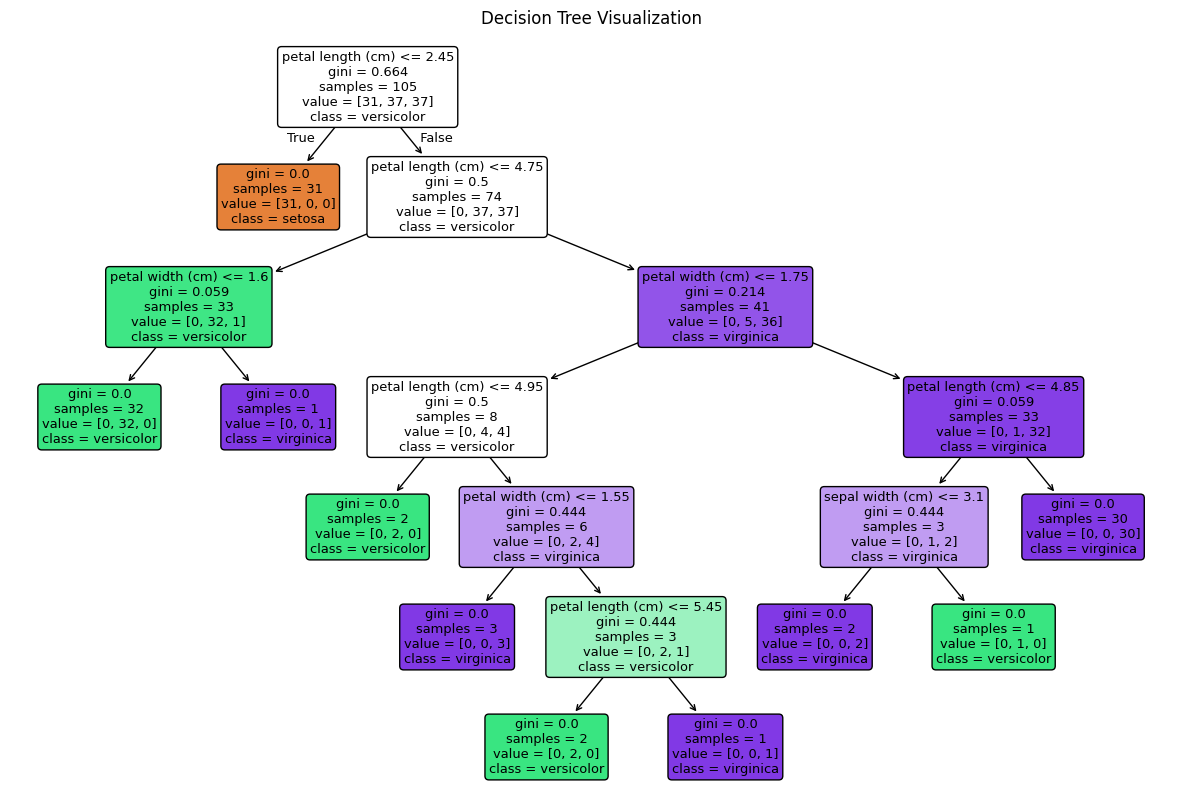

In [14]:
# Visualize the Decision Tree
plt.figure(figsize=(15, 10))
plot_tree(decision_tree,
          feature_names=iris.feature_names,
          class_names=iris.target_names,
          filled=True,
          rounded=True)
plt.title("Decision Tree Visualization")
plt.show()

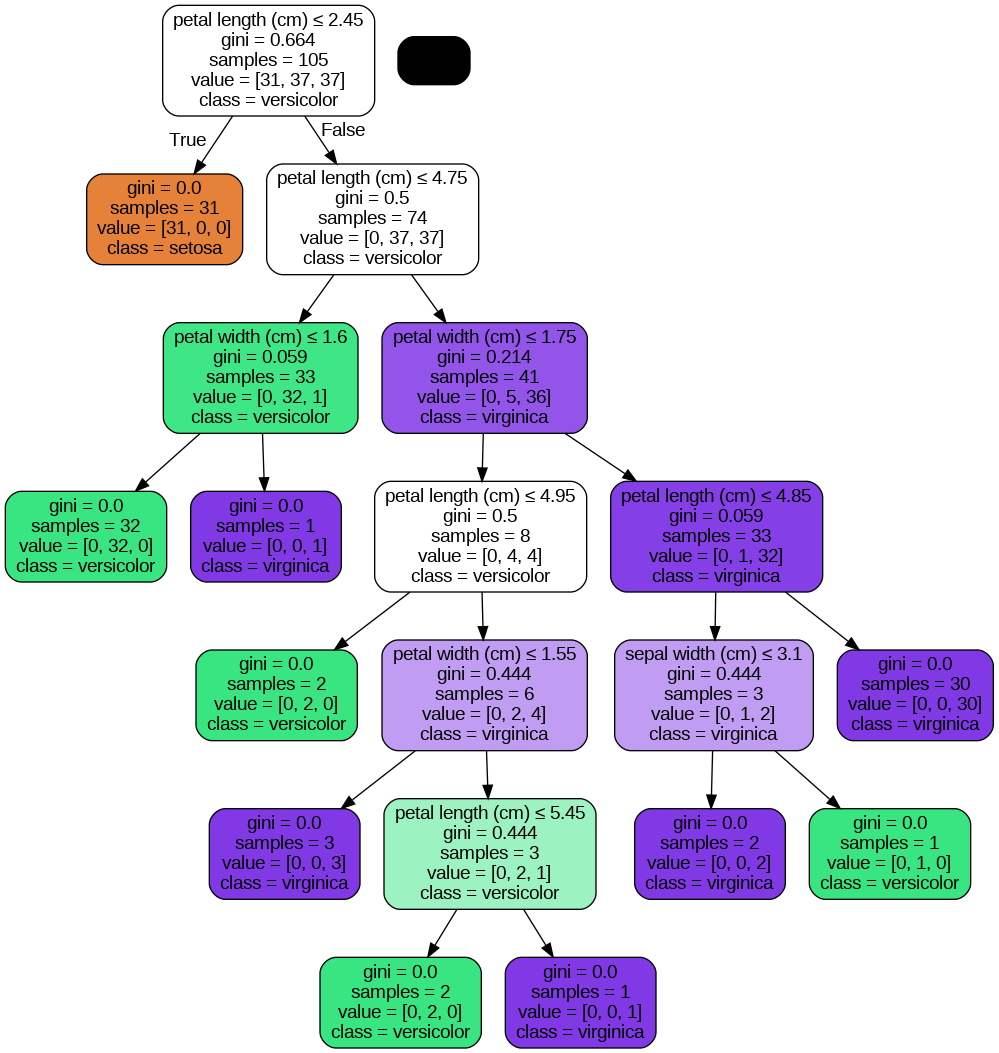

In [15]:
from sklearn.tree import export_graphviz
from io import StringIO # Use io.StringIO instead of sklearn.externals.six
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(decision_tree, out_file=dot_data,filled=True, rounded=True,special_characters=True,feature_names=iris.feature_names,
          class_names=iris.target_names)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('iris.png')
Image(graph.create_png())

# Hyperparameter Tuning - Optimizing Decision Tree Performance

- **criterion**: optional (default=**”gini”**) or Choose attribute selection measure: This parameter allows us to use the different-different attribute selection measure. Supported criteria are “gini” for the Gini index and “entropy” for the information gain.

- **splitter**: string, optional (default=” best”) or Split Strategy: This parameter allows us to choose the split strategy. Supported strategies are **“best”** to choose the best split and **“random”** to choose the best random split.

- **max_depth**: int or None, optional (default=None) or Maximum Depth of a Tree: The maximum depth of the tree. If None, then nodes are expanded until all the leaves contain less than min_samples_split samples. The higher value of maximum depth causes overfitting and the lower value causes underfitting.

In [16]:
from sklearn.model_selection import GridSearchCV

In [17]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10]
}


In [18]:
# Create a GridSearchCV object
# estimator: The model to tune (DecisionTreeClassifier)
# param_grid: The hyperparameters to search over
# cv: The number of folds for cross-validation (e.g., 5-fold cross-validation)
# scoring: The metric to evaluate the models (e.g., 'accuracy')
grid_search = GridSearchCV(estimator=decision_tree, param_grid=param_grid, cv=5, scoring='accuracy')



In [19]:
# Perform hyperparameter tuning using GridSearchCV on the training data
print("Performing hyperparameter tuning with GridSearchCV...")
grid_search.fit(X_train, y_train)
print("Hyperparameter tuning complete.")

Performing hyperparameter tuning with GridSearchCV...
Hyperparameter tuning complete.


In [20]:
# Get the best hyperparameters found by GridSearchCV
best_params = grid_search.best_params_
print("\nBest hyperparameters found:", best_params)


Best hyperparameters found: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10}


In [21]:
# Get the best model found by GridSearchCV
best_decision_tree = grid_search.best_estimator_

In [22]:
best_decision_tree

DecisionTreeClassifier(min_samples_split=10, random_state=42)

In [23]:
# Evaluate the best model on the testing data
y_pred_tuned = best_decision_tree.predict(X_test)

In [24]:
# Evaluate the performance of the tuned classifier
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
report_tuned = classification_report(y_test, y_pred_tuned, target_names=iris.target_names)

print("\nModel Evaluation with Tuned Hyperparameters:")
print(f"Accuracy: {accuracy_tuned:.2f}")
print("Classification Report:")
print(report_tuned)


Model Evaluation with Tuned Hyperparameters:
Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



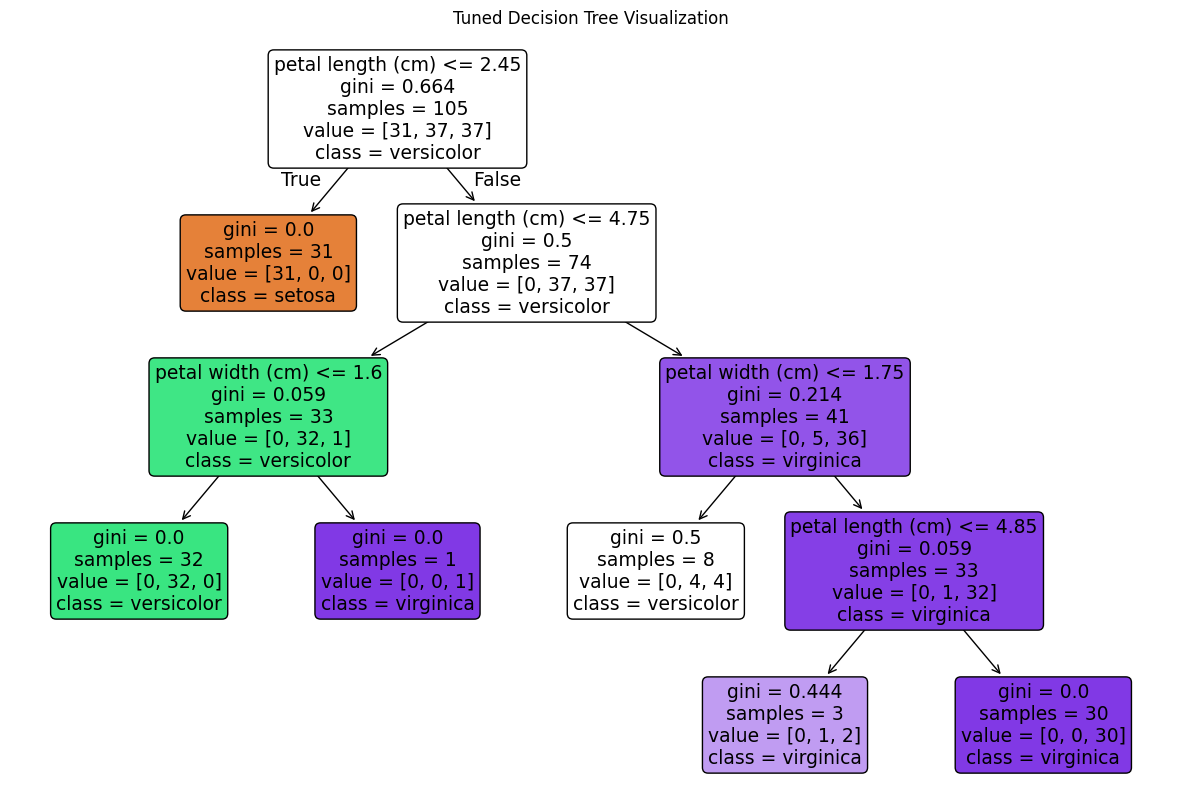

In [25]:
# Visualize the Best Decision Tree (optional)
plt.figure(figsize=(15, 10))
plot_tree(best_decision_tree,
          feature_names=iris.feature_names,
          class_names=iris.target_names,
          filled=True,
          rounded=True)
plt.title("Tuned Decision Tree Visualization")
plt.show()

In [26]:
# Import necessary libraries
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import numpy as np

In [27]:
# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target # Target variable (species)

In [28]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [29]:
# 1. Train a Decision Tree with potentially no restrictions (can overfit)
# We set ccp_alpha=0.0 to get the unpruned tree
decision_tree_unpruned = DecisionTreeClassifier(random_state=42, ccp_alpha=0.0)
decision_tree_unpruned.fit(X_train, y_train)

print("Accuracy on training data (unpruned):", accuracy_score(y_train, decision_tree_unpruned.predict(X_train)))
print("Accuracy on testing data (unpruned):", accuracy_score(y_test, decision_tree_unpruned.predict(X_test)))

Accuracy on training data (unpruned): 1.0
Accuracy on testing data (unpruned): 1.0


In [30]:
# 2. Calculate the cost complexity pruning path
path = decision_tree_unpruned.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [31]:
ccp_alphas

array([0.        , 0.00923521, 0.01269841, 0.01269841, 0.01847042,
       0.02705804, 0.25028684, 0.31210884])

In [32]:
impurities

array([0.        , 0.01847042, 0.04386724, 0.05656566, 0.07503608,
       0.10209411, 0.35238095, 0.6644898 ])

In [33]:
# In the following, we'll remove the last element of ccp_alphas as it corresponds to the trivial tree with only one node.
ccp_alphas = ccp_alphas[:-1]


In [34]:
ccp_alphas

array([0.        , 0.00923521, 0.01269841, 0.01269841, 0.01847042,
       0.02705804, 0.25028684])

In [35]:

print(f"\nIdentified {len(ccp_alphas)} effective alphas for pruning.")


Identified 7 effective alphas for pruning.


In [36]:
# 3. Train a decision tree for each effective alpha and evaluate using cross-validation
accuracy_scores = []
for ccp_alpha in ccp_alphas:
    dt = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    # Use 5-fold cross-validation to evaluate the tree with the current alpha
    scores = cross_val_score(dt, X_train, y_train, cv=5)
    accuracy_scores.append(np.mean(scores))

In [37]:
accuracy_scores

[np.float64(0.9333333333333333),
 np.float64(0.9333333333333333),
 np.float64(0.9333333333333333),
 np.float64(0.9333333333333333),
 np.float64(0.9238095238095239),
 np.float64(0.9142857142857144),
 np.float64(0.780952380952381)]

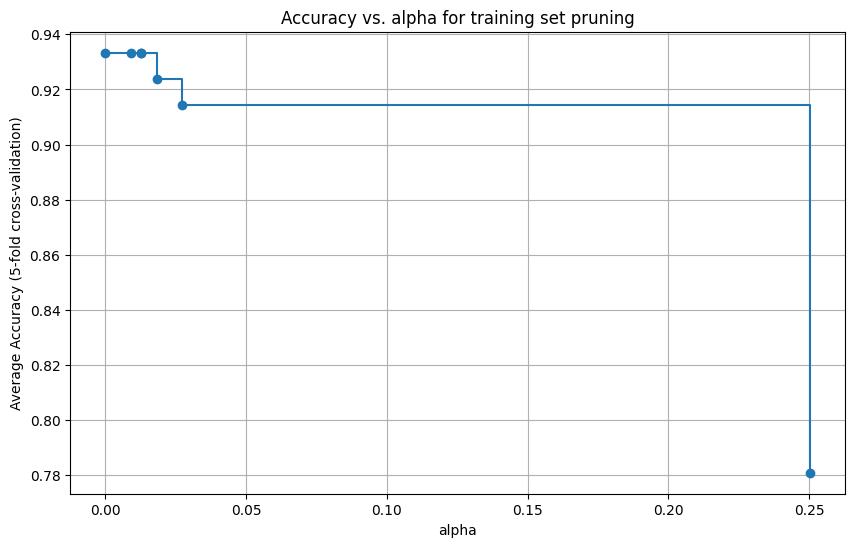

In [38]:
# 4. Plot the relationship between alpha and cross-validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, accuracy_scores, marker='o', drawstyle="steps-post")
plt.xlabel("alpha")
plt.ylabel("Average Accuracy (5-fold cross-validation)")
plt.title("Accuracy vs. alpha for training set pruning")
plt.grid(True)
plt.show()

In [39]:
# 5. Select the optimal alpha based on cross-validation accuracy
# We choose the alpha that gives the highest cross-validation accuracy
optimal_alpha_index = np.argmax(accuracy_scores)
optimal_ccp_alpha = ccp_alphas[optimal_alpha_index]

print(f"\nOptimal ccp_alpha found through cross-validation: {optimal_ccp_alpha:.4f}")


Optimal ccp_alpha found through cross-validation: 0.0000


In [40]:
# 6. Train the final Decision Tree model with the optimal alpha
decision_tree_pruned = DecisionTreeClassifier(random_state=42, ccp_alpha=optimal_ccp_alpha)
decision_tree_pruned.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=np.float64(0.0), random_state=42)

In [41]:
# 7. Evaluate the pruned model on the testing data
y_pred_pruned = decision_tree_pruned.predict(X_test)

In [42]:
# Evaluate the performance of the pruned classifier
accuracy_pruned = accuracy_score(y_test, y_pred_pruned)
report_pruned = classification_report(y_test, y_pred_pruned, target_names=iris.target_names)

print("\nModel Evaluation with Pruning (Optimal alpha):")
print(f"Accuracy: {accuracy_pruned:.2f}")
print("Classification Report:")
print(report_pruned)


Model Evaluation with Pruning (Optimal alpha):
Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



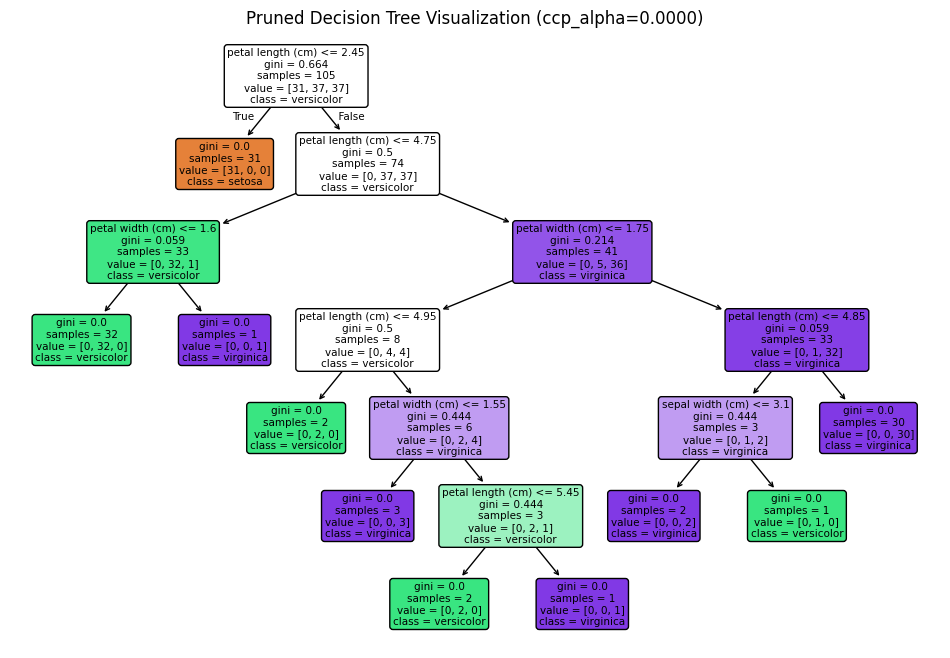

In [43]:
# Visualize the Pruned Decision Tree (optional)
plt.figure(figsize=(12, 8))
plot_tree(decision_tree_pruned,
          feature_names=iris.feature_names,
          class_names=iris.target_names,
          filled=True,
          rounded=True)
plt.title(f"Pruned Decision Tree Visualization (ccp_alpha={optimal_ccp_alpha:.4f})")
plt.show()

# Save Model

In [44]:
import joblib # Import joblib for saving and loading models
import os     # Import os to check if file exists


In [45]:
# Define the filename for the saved model
model_filename = 'pruned_decision_tree_model.joblib'


In [46]:
# Save the trained model to a file
print(f"\nSaving the trained model to {model_filename}...")
joblib.dump(decision_tree_pruned, model_filename)
print("Model saved successfully.")


Saving the trained model to pruned_decision_tree_model.joblib...
Model saved successfully.


In [47]:
# --- Load the model from the file and make predictions ---

# Simulate loading the model in a new script or session
print(f"\nLoading the model from {model_filename}...")
if os.path.exists(model_filename):
    loaded_model = joblib.load(model_filename)
    print("Model loaded successfully.")

    new_data = np.array([
        [5.1, 3.5, 1.4, 0.2],
        [6.0, 2.9, 4.5, 1.5],
        [6.7, 3.0, 5.2, 2.3]
    ])

    print("\nMaking predictions on new data:")
    predictions = loaded_model.predict(new_data)

    # Print the predictions and their corresponding class names
    predicted_species = [iris.target_names[p] for p in predictions]
    for i, data_point in enumerate(new_data):
        print(f"Data: {data_point}, Predicted Species: {predicted_species[i]}")

else:
    print(f"Error: Model file '{model_filename}' not found.")




Loading the model from pruned_decision_tree_model.joblib...
Model loaded successfully.

Making predictions on new data:
Data: [5.1 3.5 1.4 0.2], Predicted Species: setosa
Data: [6.  2.9 4.5 1.5], Predicted Species: versicolor
Data: [6.7 3.  5.2 2.3], Predicted Species: virginica


# Reference



- https://machinelearninggeek.com/decision-tree-classification-in-python/